# **MACHINE LEARNING - PROJECT 1**





## **Classification of Breast Cancer based on a set of real valued features**


Cancer is one of the most dreaded disease in living beings. There are two types of cancers depending on
how they spread : Benign and Malignant.
Thus with the necessary features, this can be seen as a binary
classification problem.


---



---



**Importing the neccesary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing and loading the dataset through scikit-learn**



The original Wisconsin-Breast Cancer (Diagnostics) dataset (WBC) from UCI machine
learning repository is a classification dataset, which records the measurements for breast cancer cases.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

**Dataset description**

In [ ]:
print(data.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Creating a dataframe**

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Describing the dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## **Data visualization**

---










**Finding the correlation between the different features**

In [ ]:
corr = df.iloc[:,:-1].corr()
corr.shape

(30, 30)

**Plotting a heatmap of the correlation between the features**

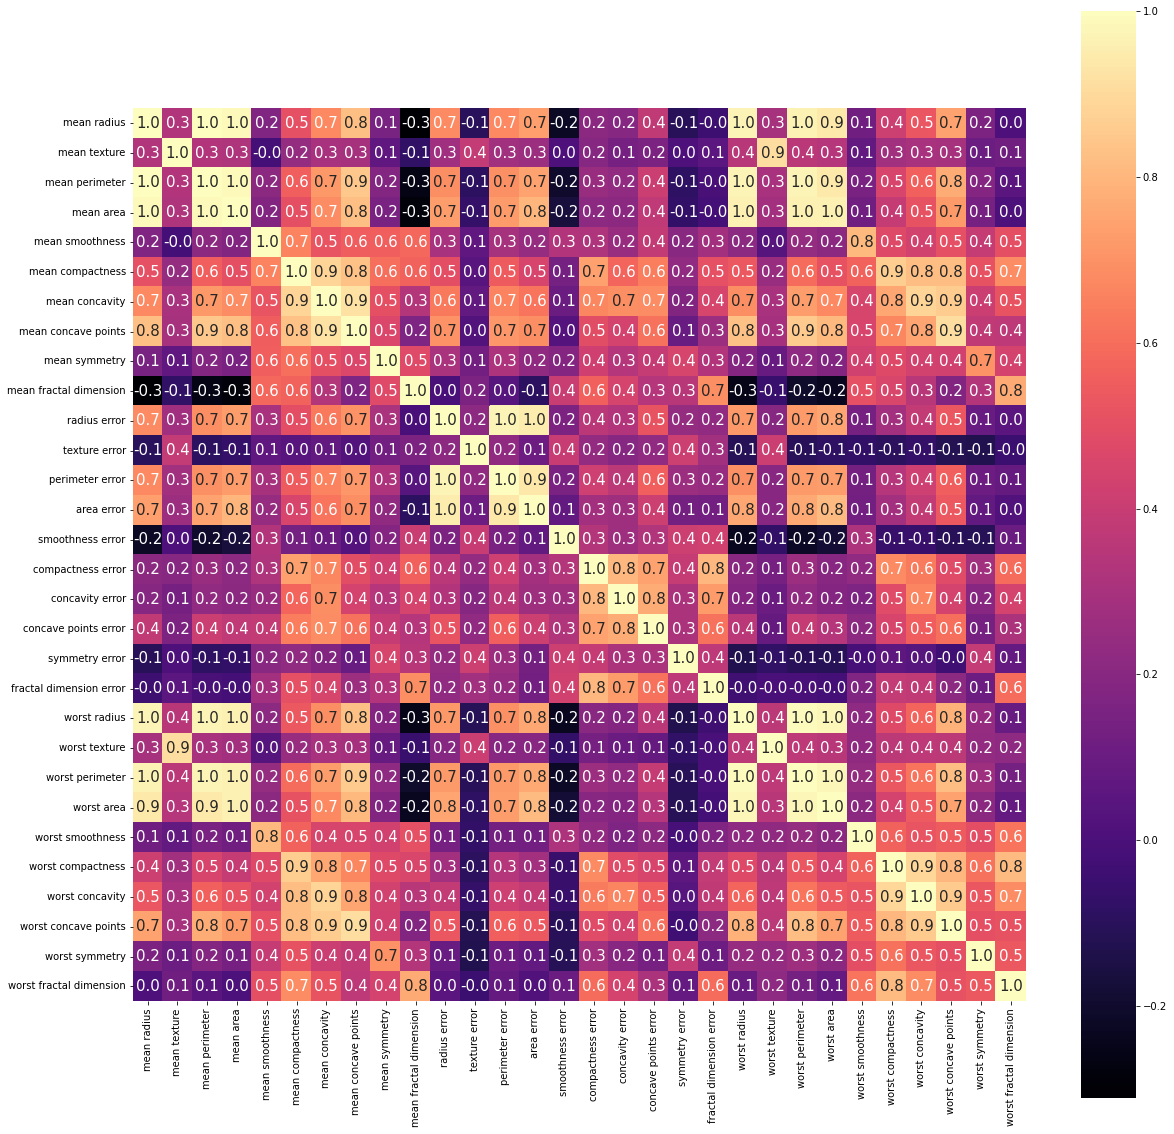

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='magma')
plt.show()

**Analyzing the target variable**

In [ ]:
target_mapping = {
    0:'Malignant',
    1:'Benign'
}
df["target"] = df["target"].map(lambda x: target_mapping[x])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


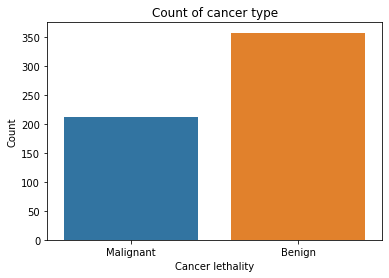

In [ ]:
plt.title('Count of cancer type')
sns.countplot(df['target'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

**Distribution density plot KDE (kernel density estimate)**

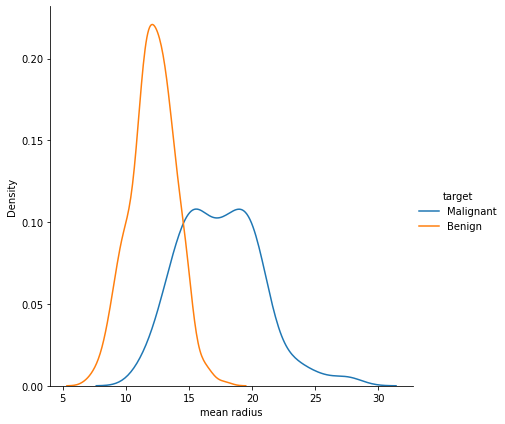

In [ ]:
sns.FacetGrid(df, hue="target", height=6).map(sns.kdeplot, "mean radius").add_legend()
plt.show()

**Plotting bivariate relations between each pair of features**

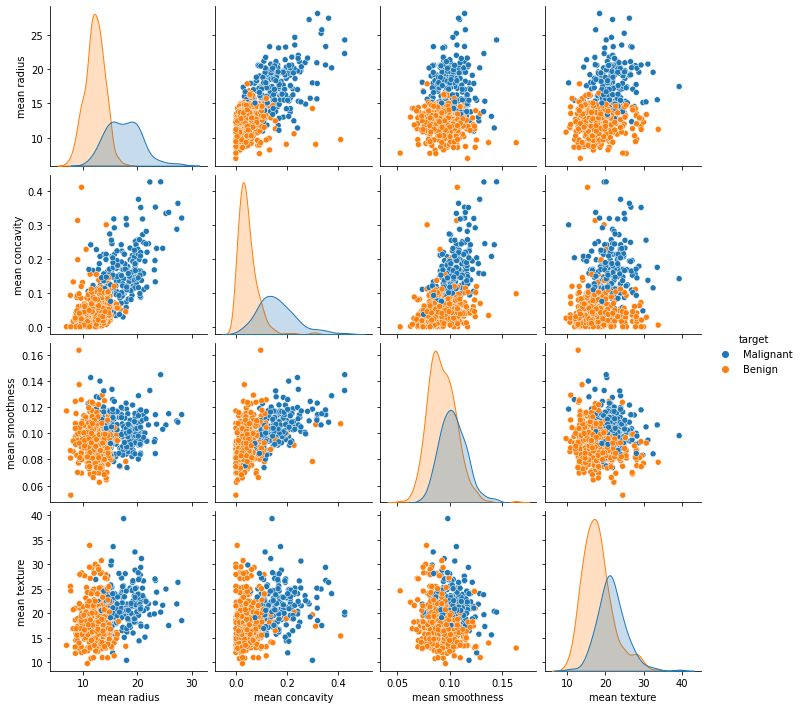

In [ ]:
sns.pairplot(df, hue="target", vars = ["mean radius", "mean concavity", "mean smoothness", "mean texture"])
plt.show()

## **Building the Machine Learning model**

**Splitting the dataset**

In [ ]:
X = data.data
y = data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

NameError: ignored

**Comparing** **the performance of different models:**

1.   Gaussian Naive Bayes Classifier
2.   K nearest neighbours classifier
3.   Decision tree classifier
4.   Random forest classifier



---



---


**Naive Bayes** are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier. **Gaussian Naive Bayes** is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  6]
 [ 4 84]]




---


Finding accuracy from confusion matrix



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9300699300699301




---


Displaying the classification report




In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.93      0.95      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143





---


---



**K-Nearest Neighbors (KNN)** is one of the simplest algorithms used 
in Machine Learning for regression and classification problem. KNN 

algorithms use data and classify new data points based on similarity measures (e.g. distance function).

Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[47  8]
 [ 1 87]]




---


Finding accuracy from confusion matrix


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9370629370629371




---


Displaying the classification report


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        55
           1       0.92      0.99      0.95        88

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143





---


---


**Decision Tree** is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  7]
 [ 3 85]]




---


Finding the accuracy from confusion matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9300699300699301




---


Displaying the classification report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        55
           1       0.92      0.97      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143





---



---


**Random Forest** is a machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  3]
 [ 2 86]]




---


Finding the accuracy from the confusion matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.965034965034965




---


Displaying the classification report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.97      0.98      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143





---


**Comparing** **the performance of different models:**

1.   Gaussian Naive Bayes Classifier - 93.006%
2.   K nearest neighbours classifier - 93.706%
3.   Decision tree classifier -  93.006%
4.   Random forest classifier - 96.503%

we see that the Random forest classifier has a superior performance in terms of accuracy of classification.


---



---

